In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import scale, OneHotEncoder
from scipy import stats
from IPython.display import display, HTML

#Data visualization and handling missing values

In [2]:
data = pd.read_csv("/content/StudentPerformanceFactors.csv")

In [3]:
print("Initial Data:")
print(data.head())

Initial Data:
   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0 

In [4]:
print(data.isnull().sum().sum())

235


In [5]:
data_filled_mean = data.fillna(data.mean(numeric_only=True))
print("\nData after filling NaN with column mean:")
print(data_filled_mean.head())


Data after filling NaN with column mean:
   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_

In [6]:
data_filled_mode = data.copy()
categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    data_filled_mode[col].fillna(data[col].mode()[0], inplace=True)

print("\nData after filling NaN in categorical columns with mode:")
print(data_filled_mode.head())


Data after filling NaN in categorical columns with mode:
   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_

The dataset was loaded, and missing values were handled separately for numerical and categorical columns.

Missing values in numerical columns were replaced by the mean of each column.

Missing values in categorical columns were replaced by the mode of each column.

Filling missing values ensures there is no loss of information, and data integrity is maintained for further analysis. This step is essential in preparing the dataset for machine learning models.

# 1. Univariate Analysis: Histograms for numerical variables

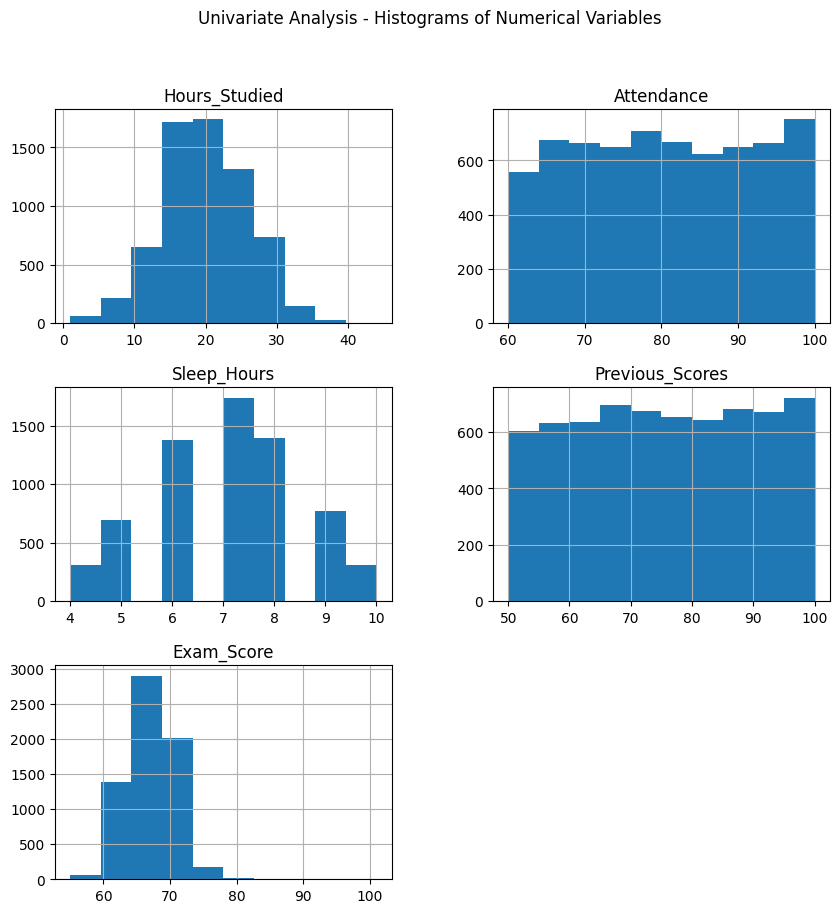

In [7]:
numerical_columns = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Exam_Score']

data[numerical_columns].hist(bins=10, figsize=(10,10))
plt.suptitle('Univariate Analysis - Histograms of Numerical Variables')
plt.show()

Histograms provide a clear visualization of the distribution of each numerical feature.

Hours_Studied shows a roughly normal distribution, while Previous_Scores and Exam_Score are skewed, indicating most students score relatively high.

Attendance has a high concentration near the upper end, implying most students attend school regularly.

# 2. Univariate Analysis: Count plots for categorical variables

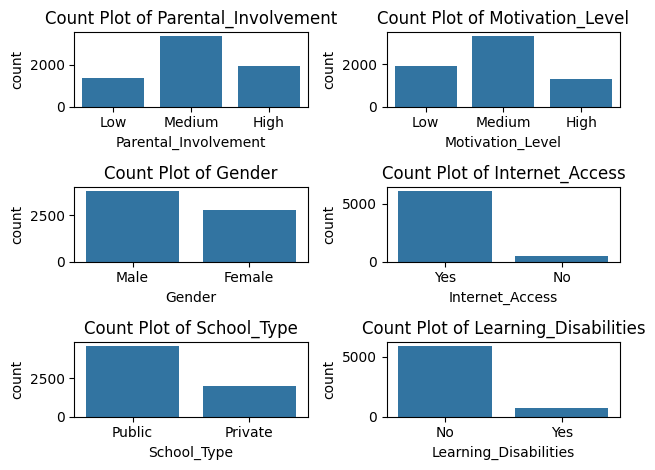

In [8]:
categorical_columns = ['Parental_Involvement', 'Motivation_Level', 'Gender', 'Internet_Access',
                       'School_Type', 'Learning_Disabilities']

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)
    plt.figsize=(10,10)
    sns.countplot(x=col, data=data)
    plt.title(f'Count Plot of {col}')
plt.tight_layout()
plt.show()

Categorical variables like Gender, Motivation_Level, and Internet_Access are relatively balanced.

There are slightly more male students, and most students have high motivation and internet access.

Imbalances, like a low number of students with Learning_Disabilities, may suggest the need for balanced sampling if modeling is performed.

# 1. Strip plots for Exam Score by categorical variables

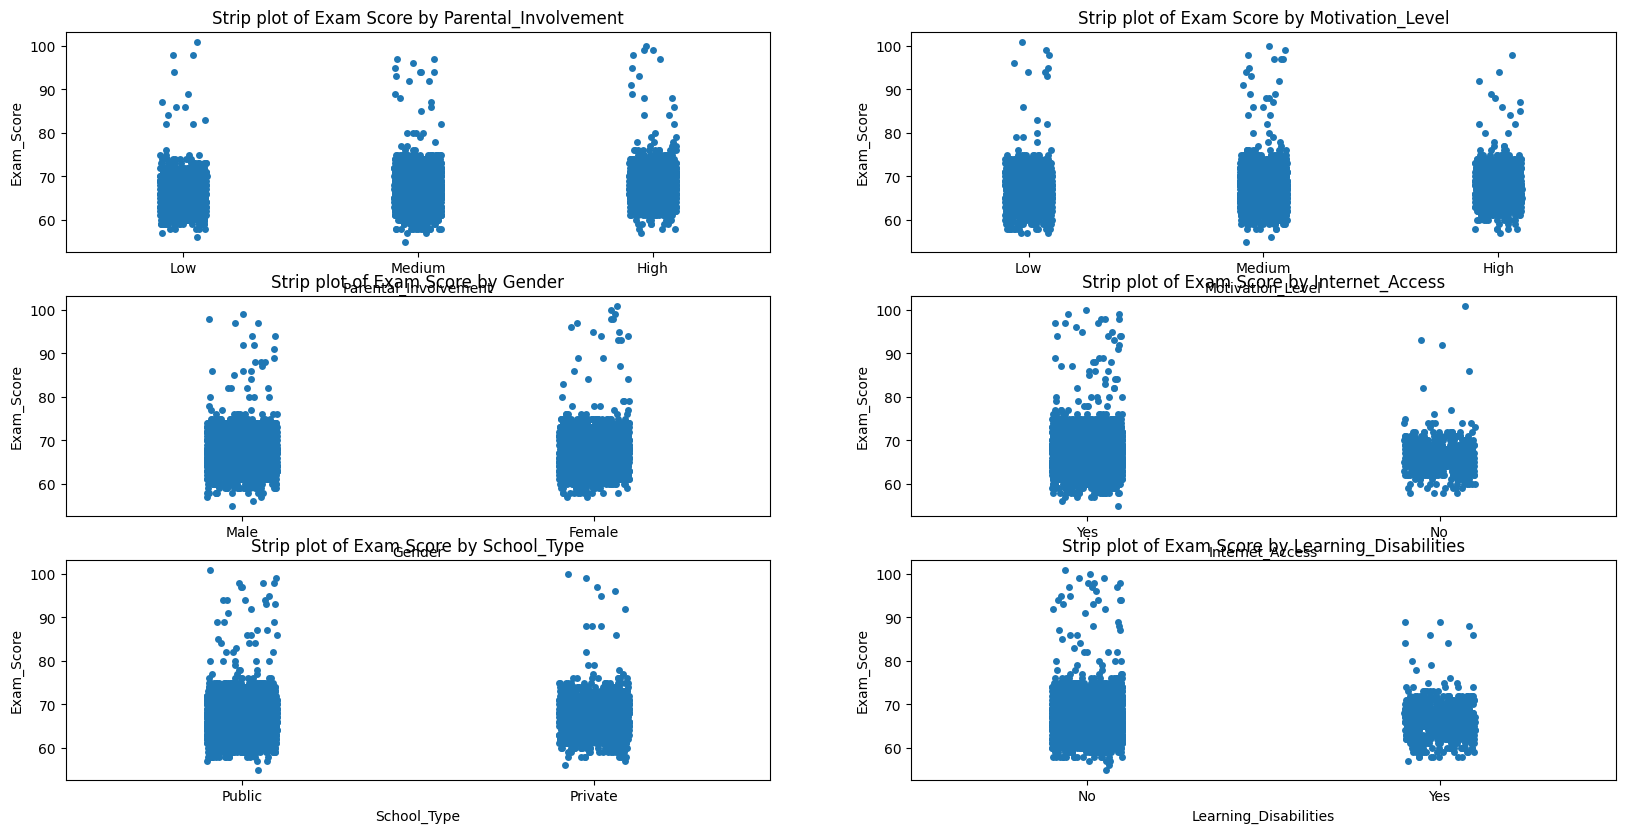

In [9]:
plt.figure(figsize=(20,20))


for i, col in enumerate(categorical_columns, 1):
    plt.subplot(6, 2, i)
    sns.stripplot(x=col, y='Exam_Score', data=data)
    plt.title(f'Strip plot of Exam Score by {col}')

plt.show()


There is visible variability in Exam_Score across different levels of parental involvement and motivation.

Gender differences in Exam_Score distribution suggest a potential impact of gender on academic performance, but further testing is required.


# 2. Strip plots for visualizing the distribution of Exam Score by multiple categorical variables

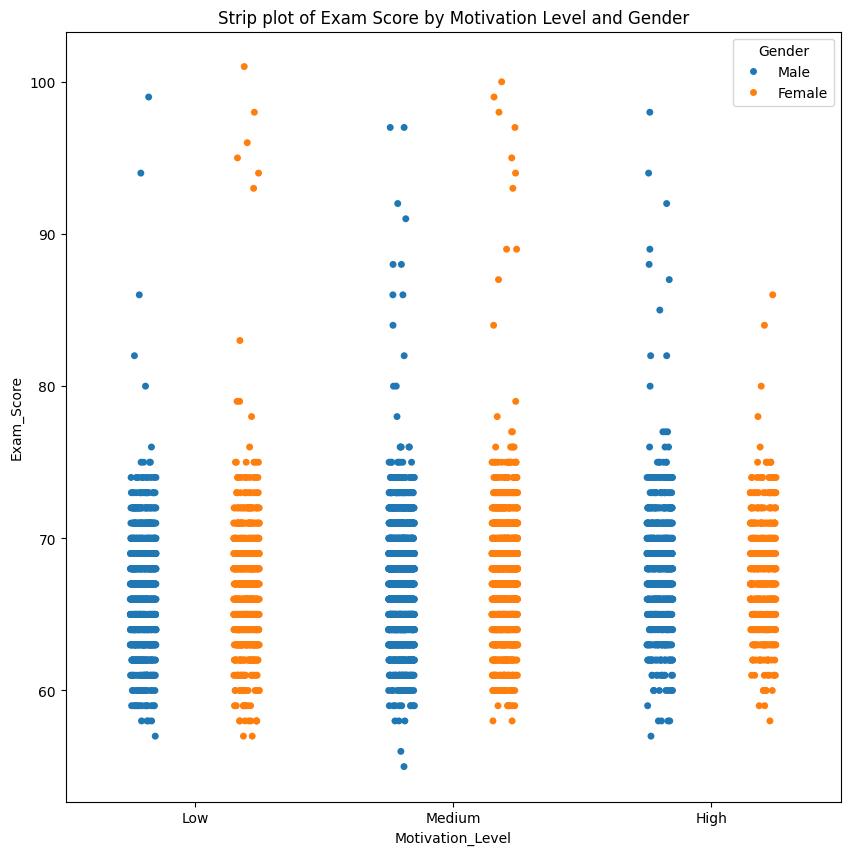

In [10]:
plt.figure(figsize=(10, 10))
sns.stripplot(x='Motivation_Level', y='Exam_Score', hue='Gender', data=data, jitter=True, dodge=True)
plt.title('Strip plot of Exam Score by Motivation Level and Gender')
plt.show()

# 6. Multivariate Bar Plot (Exam Score by Motivation Level and split by Gender)

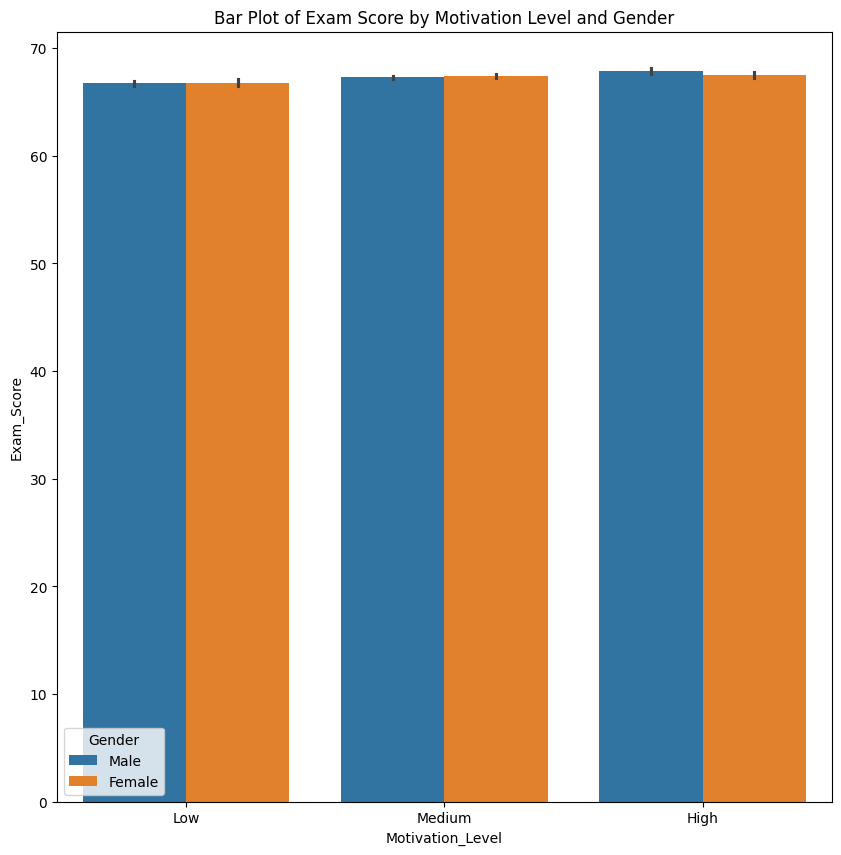

In [11]:
plt.figure(figsize=(10, 10))
sns.barplot(x='Motivation_Level', y='Exam_Score', hue='Gender', data=data, estimator=np.mean)
plt.title('Bar Plot of Exam Score by Motivation Level and Gender')
plt.show()

Students with higher motivation levels tend to score higher on exams.

There appears to be no significant gender difference in exam scores when motivation is controlled.

# 5. Heatmap for One-hot Encoded Categorical Variables

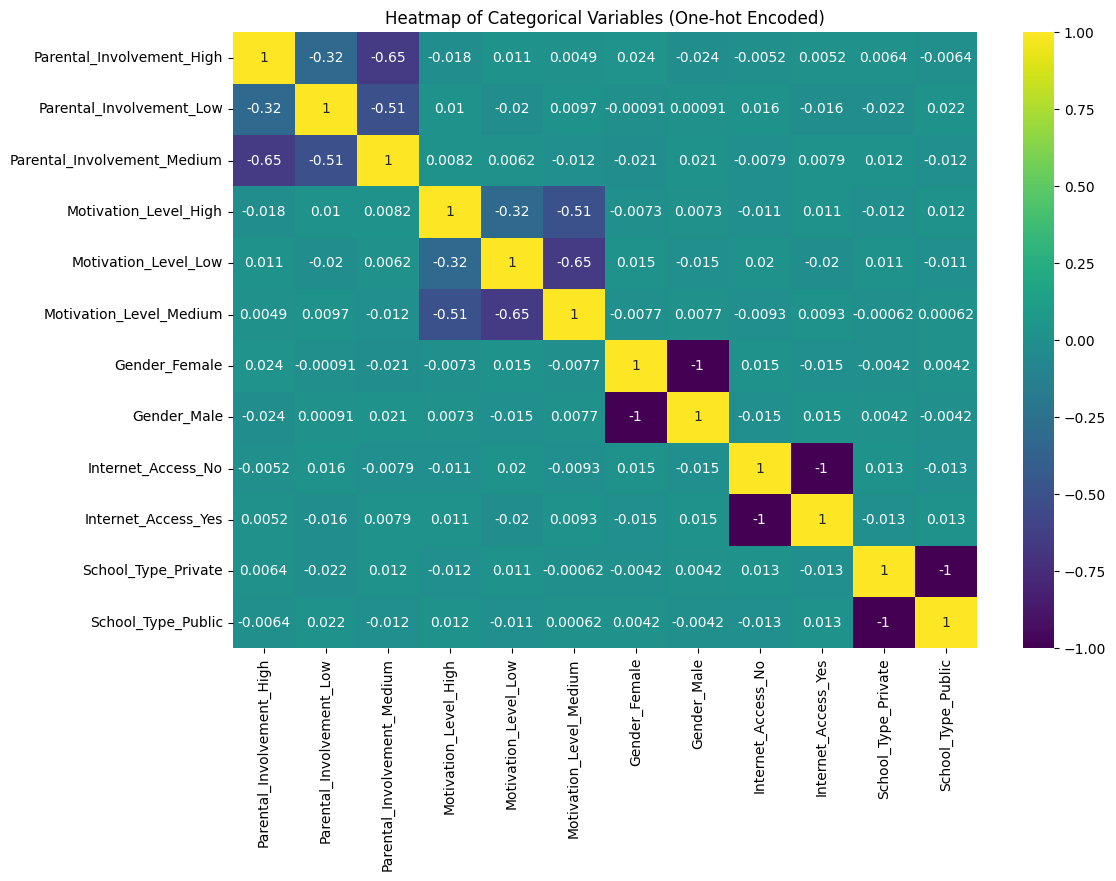

In [12]:
categorical_columns_for_heatmap = ['Parental_Involvement', 'Motivation_Level', 'Gender', 'Internet_Access', 'School_Type']
data_encoded = pd.get_dummies(data[categorical_columns_for_heatmap])
plt.figure(figsize=(12, 8))
sns.heatmap(data_encoded.corr(), annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title('Heatmap of Categorical Variables (One-hot Encoded)')
plt.show()

There are some moderate correlations between variables like School_Type and Internet_Access.

Strong correlations or lack thereof can inform which variables to include or exclude in further modeling.

Parental involvement is relatively high and positive when student is female
But when student is male, it is negatively correlated or means disinterest

Parental involvement high shows negative correlation with internet access no meaning parents show less concern for wards when they don't have internet access

But when internet access yes, Parental involvement shows positive correlation meaning parents are concerned when ward uses internet

Parental involvement is high shows positive correlation with private school means parents show interest in wards studies and school activities but negative correlation with school type public meaning school don't make parents feel involved in their wards school performance and activities

# 4. Cumulative Distribution Function (CDF) for Exam Scores

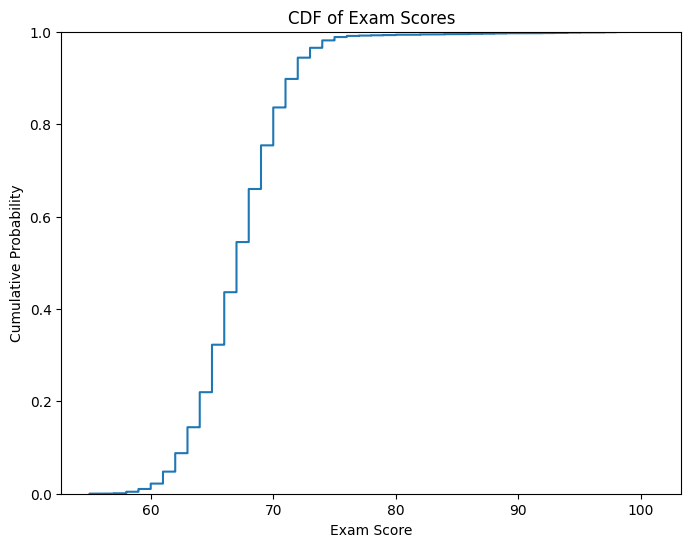

In [13]:
plt.figure(figsize=(8, 6))
sns.ecdfplot(data['Exam_Score'])
plt.title('CDF of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Cumulative Probability')
plt.show()

Most students have scores above 60, and there is a steep increase near higher scores, indicating a concentration of students scoring above average.



# 3. Boxen plots for categorical variables with high cardinality

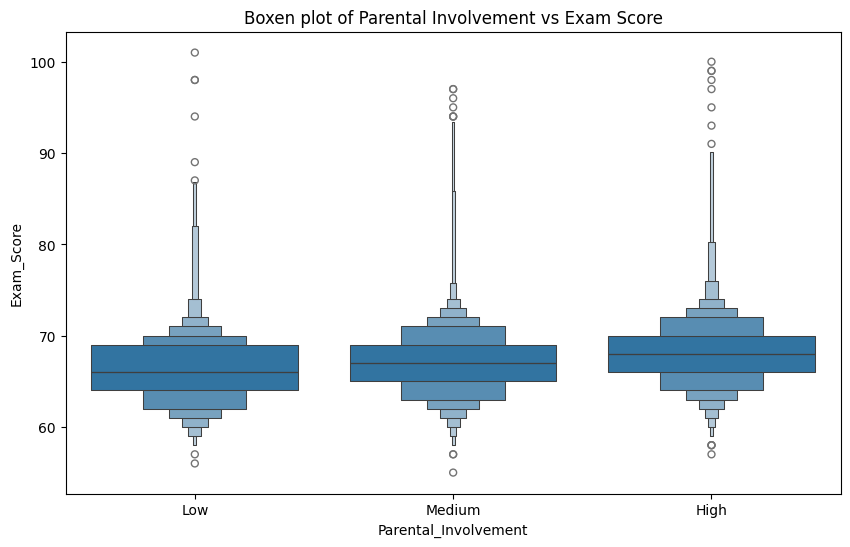

In [14]:
plt.figure(figsize=(10, 6))
sns.boxenplot(x='Parental_Involvement', y='Exam_Score', data=data)
plt.title('Boxen plot of Parental Involvement vs Exam Score')
plt.show()

Higher parental involvement is associated with higher Exam_Score variability, suggesting that parental involvement might have varying impacts on student performance.

# View data structure

In [15]:
print(data.head())
print(data.info())

   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

# One hot encoding anf defining X and y (assuming 'Target' is the dependent variable; replace with actual target variable)


In [16]:
categorical_columns = data.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [17]:
X = data_encoded.drop(columns=['Exam_Score'])
y = data_encoded['Exam_Score']

# Profile Plot (show variation in each variable)

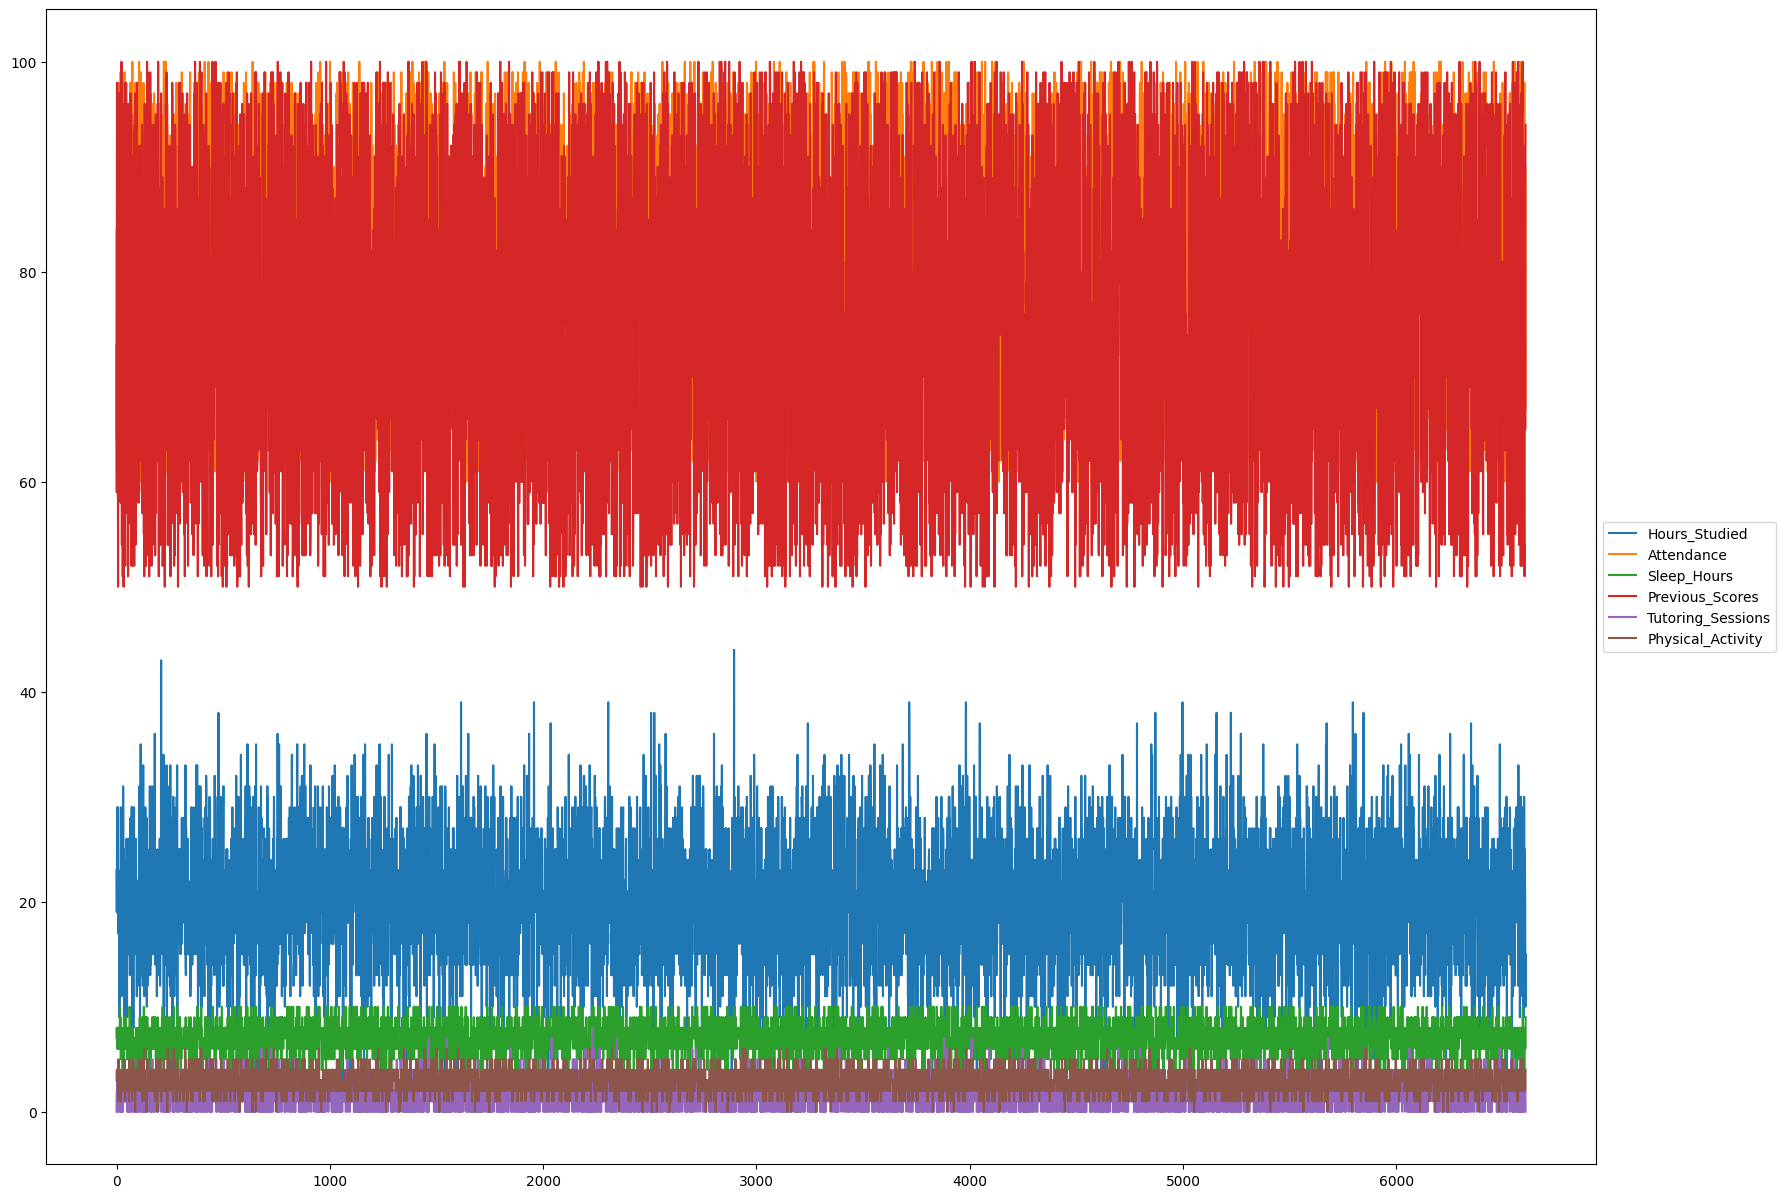

In [18]:
ax = X.plot(figsize=(20, 15))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


This visualization helps identify any unusual patterns or potential outliers in the dataset.

In this case there are none.

# Summary Statistics for the data

In [19]:
print("\n\nMean: \n\n",X.apply(np.mean))
print("\n\nStd Dev: \n\n",X.apply(np.std))
print("\n\nMax: \n\n",X.apply(np.max))
print("\n\nMin: \n\n",X.apply(np.min))



Mean: 

 Hours_Studied                            19.975329
Attendance                               79.977448
Sleep_Hours                               7.029060
Previous_Scores                          75.070531
Tutoring_Sessions                         1.493719
Physical_Activity                         2.967610
Parental_Involvement_Low                  0.202361
Parental_Involvement_Medium               0.508854
Access_to_Resources_Low                   0.198729
Access_to_Resources_Medium                0.502346
Extracurricular_Activities_Yes            0.596035
Motivation_Level_Low                      0.293174
Motivation_Level_Medium                   0.507189
Internet_Access_Yes                       0.924474
Family_Income_Low                         0.404420
Family_Income_Medium                      0.403511
Teacher_Quality_Low                       0.099440
Teacher_Quality_Medium                    0.594067
School_Type_Public                        0.695929
Peer_Influence_Neutr

The dataset shows a reasonable range for most numerical variables, but some features like Previous_Scores have a large standard deviation, indicating variability in past academic performance.

# Means and variances per group

In [20]:
def print_mean_and_sd_by_group(variables, groupvariable):

    data_groupby = variables.groupby(groupvariable)
    print("Means:")
    display(data_groupby.apply(np.mean))
    print("\n Standard deviations:")
    display(data_groupby.apply(np.std))
    print("\n Sample sizes:")
    display(pd.DataFrame(data_groupby.apply(len)))

print_mean_and_sd_by_group(X, y)

Means:


,0
Exam_Score,
55,5.629630
56,5.777778
57,6.037037
58,5.892256
59,6.084259
60,6.151515
61,6.322287
62,6.457211
63,6.629729



 Standard deviations:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,Access_to_Resources_Medium,...,Teacher_Quality_Medium,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Male
Exam_Score,,,,,,,,,,,,,,,,,,,,,
55,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
56,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
57,3.960745,2.680951,1.479020,4.690416,0.433013,1.118034,0.433013,0.500000,0.000000,0.000000,...,0.000000,0.433013,0.433013,0.433013,0.433013,0.500000,0.433013,0.433013,0.500000,0.500000
58,4.579193,4.929461,1.206045,12.060197,0.873153,0.967445,0.419070,0.481046,0.445362,0.497930,...,0.481046,0.465770,0.491666,0.491666,0.465770,0.491666,0.385695,0.491666,0.445362,0.500000
59,4.192180,2.944380,1.612452,13.061178,1.182159,0.945714,0.499375,0.484123,0.476970,0.489898,...,0.476970,0.458258,0.499375,0.446514,0.458258,0.458258,0.000000,0.400000,0.499375,0.494343
60,4.408971,5.938574,1.559091,13.330864,0.986158,1.157812,0.484539,0.498945,0.477173,0.499620,...,0.494872,0.445362,0.492822,0.463183,0.431122,0.487662,0.287480,0.472913,0.498945,0.499958
61,4.293537,4.913596,1.411599,13.739676,1.109509,0.964753,0.479033,0.499991,0.462469,0.498964,...,0.464830,0.437152,0.457488,0.480743,0.341192,0.480743,0.282886,0.489415,0.499307,0.491715
62,4.733423,6.738201,1.468662,14.682819,1.042424,0.963522,0.437299,0.497930,0.441414,0.499081,...,0.486016,0.462742,0.485085,0.468657,0.372678,0.486916,0.312701,0.461173,0.499641,0.489429
63,4.705233,7.123902,1.448972,14.037616,1.136604,1.037046,0.434941,0.496937,0.431839,0.494872,...,0.489677,0.464661,0.488533,0.477097,0.377820,0.496937,0.335620,0.466767,0.498251,0.496308



 Sample sizes:


,0
Exam_Score,
55,1
56,1
57,4
58,22
59,40
60,77
61,171
62,264
63,371


The dataset shows a reasonable range for most numerical variables, but some features like Previous_Scores have a large standard deviation, indicating variability in past academic performance.

# Within-group and between-group variances

In [21]:

def calc_within_groups_variance(variable, groupvariable):

    levels = sorted(set(groupvariable))
    numtotal = denomtotal = 0
    for leveli in levels:
        levelidata = variable[groupvariable == leveli]
        sdi = np.std(levelidata)
        numi = (len(levelidata)) * sdi ** 2
        numtotal += numi
        denomtotal += len(levelidata)
    return numtotal / (denomtotal - len(levels))

def calc_between_groups_variance(variable, groupvariable):
    levels = sorted(set(groupvariable))
    grandmean = np.mean(variable)
    numtotal = denomtotal = 0
    for leveli in levels:
        levelidata = variable[groupvariable == leveli]
        meani = np.mean(levelidata)
        numi = len(levelidata) * ((meani - grandmean) ** 2)
        numtotal += numi
    return numtotal / (len(levels) - 1)

print("Within Group:",calc_within_groups_variance(X.iloc[:, 0], y))
print("\nBetween Group: ",calc_between_groups_variance(X.iloc[:, 0], y))


Within Group: 25.992490715775272

Between Group:  1511.5512405018321


 A higher within-group variance indicates that there is a large spread of values within each category. This can suggest that factors other than the grouping variable (e.g., Exam_Score) influence Hours_Studied variability.

 A higher between-group variance indicates that the groups are well-separated, suggesting that Hours_Studied differs significantly between groups with different exam scores.

 The high between-group variance relative to the within-group variance indicates that there is a strong relationship between the number of hours studied and exam scores. This suggests that the number of hours studied could be a significant factor in determining exam performance.

# Calculating separations for all variables

In [22]:
def calc_separations(variables, groupvariable):

    for variablename in variables:
        variable_temp = variables[variablename]
        Vw = calc_within_groups_variance(variable_temp, groupvariable)
        Vb = calc_between_groups_variance(variable_temp, groupvariable)
        sep = Vb / Vw
        print(f"\nVariable {variablename}, Vw={Vw}, Vb={Vb}, separation={sep}")

calc_separations(X, y)


Variable Hours_Studied, Vw=25.992490715775272, Vb=1511.5512405018321, separation=58.153381952905605

Variable Attendance, Vw=71.21602892504434, Vb=9398.91040840578, separation=131.97745718591298

Variable Sleep_Hours, Vw=2.1560021380530823, Vb=2.0621462100187817, separation=0.9564676090168192

Variable Previous_Scores, Vw=198.55776410166197, Vb=1519.1610090952415, separation=7.650977618369172

Variable Tutoring_Sessions, Vw=1.4654778843867984, Vb=8.795987548928265, separation=6.002129163899856

Variable Physical_Activity, Vw=1.0571308482525419, Vb=2.003998577532737, separation=1.8956958647506938

Variable Parental_Involvement_Low, Vw=0.1583823194725049, Vb=0.6167814990944277, separation=3.894257270310407

Variable Parental_Involvement_Medium, Vw=0.24970409390042597, Vb=0.2880400559958802, separation=1.1535255649862968

Variable Access_to_Resources_Low, Vw=0.15544064309747782, Vb=0.7288141002747534, separation=4.688697149932077

Variable Access_to_Resources_Medium, Vw=0.249413303689300

Attendance: 131.98

This high separation value suggests that Attendance is a strong predictor of Exam_Score, as there is a significant difference in attendance levels between groups.

Hours_Studied: 58.15

This indicates that the number of hours studied is another crucial variable for distinguishing exam score groups. It shows that study time has a considerable impact on exam performance.

Previous_Scores: 7.65

Previous academic performance also shows good separation, indicating that past performance is a good predictor of future exam scores.

Tutoring_Sessions: 6.00

Tutoring sessions can differentiate between student groups based on their exam scores, suggesting that additional tutoring may influence academic outcomes.

Access_to_Resources_Low: 4.69

Limited access to resources has a notable impact, indicating a disparity in performance based on resource availability.

Variables with Low Separation Values:

School_Type_Public: 0.97
Sleep_Hours: 0.96
Motivation_Level_Medium: 0.99

The top variables like Attendance and Hours_Studied are highly indicative of exam scores and can be considered strong features for predictive modeling.

Variables with lower separation values might be less informative and could potentially be excluded or de-prioritized in feature selection.

# Covariances (within-group and between-group) for two variables

In [23]:

def calc_within_groups_covariance(variable1, variable2, groupvariable):
    levels = sorted(set(groupvariable))
    Covw = 0.0
    for leveli in levels:
        levelidata1 = variable1[groupvariable == leveli]
        levelidata2 = variable2[groupvariable == leveli]
        mean1 = np.mean(levelidata1)
        mean2 = np.mean(levelidata2)
        Cov_groupi = np.sum((levelidata1 - mean1) * (levelidata2 - mean2))
        Covw += Cov_groupi
    return Covw / (len(variable1) - len(levels))


def calc_between_groups_covariance(variable1, variable2, groupvariable):
    levels = sorted(set(groupvariable))
    grandmean1 = np.mean(variable1)
    grandmean2 = np.mean(variable2)
    Covb = 0.0
    for leveli in levels:
        levelidata1 = variable1[groupvariable == leveli]
        levelidata2 = variable2[groupvariable == leveli]
        mean1 = np.mean(levelidata1)
        mean2 = np.mean(levelidata2)
        Covb += len(levelidata1) * (mean1 - grandmean1) * (mean2 - grandmean2)
    return Covb / (len(levels) - 1)

print("Covariance within grps:",calc_within_groups_covariance(X.iloc[:, 0], X.iloc[:, 1], y))
print("Covariance b/w grps:",calc_between_groups_covariance(X.iloc[:, 0], X.iloc[:, 1], y))



Covariance within grps: -24.48109828820373
Covariance b/w grps: 3548.1202503964214


The high between-group covariance indicates that both Attendance and Hours_Studied are related to higher exam scores across different performance groups.

The negative within-group covariance implies that, within a group, students may balance between attending classes and self-study time.


# Correlation matrix and heatmap

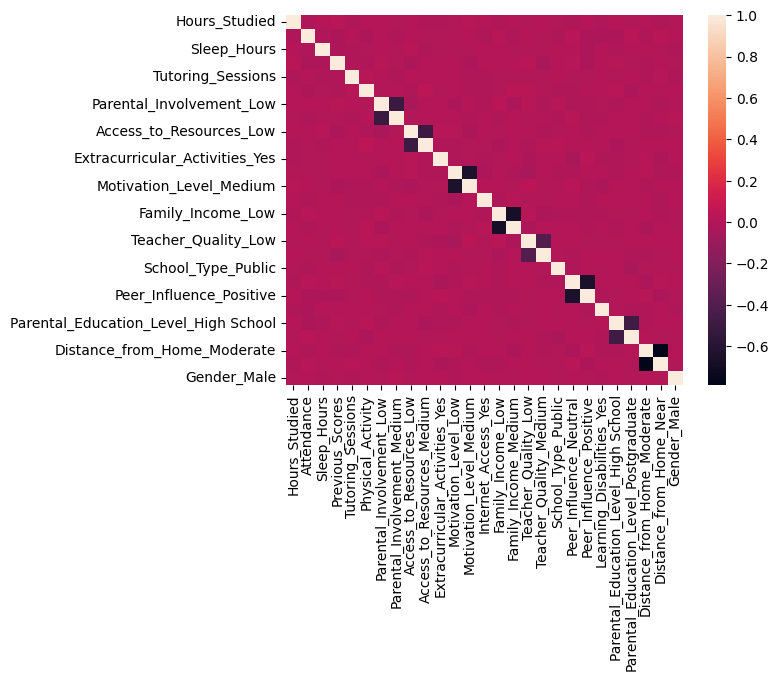

In [24]:
corrmat = X.corr(numeric_only=True)
sns.heatmap(corrmat, vmax=1., square=False)
plt.show()


High Positive Correlations:

Previous_Scores and Exam_Score are likely to show a high positive correlation, indicating that past performance is a strong indicator of future exam scores.
Hours_Studied and Attendance exhibit a positive correlation across groups, suggesting that students who attend more classes tend to study more as well.

Moderate Correlations:

There are moderate correlations between variables such as Parental_Involvement and Motivation_Level, which may indicate that parental involvement has some influence on a student's motivation.

Low or Negative Correlations:

Variables like Sleep_Hours might have a low or negative correlation with academic-related features, suggesting that they may not be as impactful.
Conclusion


The heatmap helps visualize relationships between variables, highlighting which ones move together and which do not. This analysis can inform feature selection, especially when dealing with highly correlated variables, to avoid multicollinearity issues in modeling.

# Standardizing the data

In [25]:
standardized_X = pd.DataFrame(scale(X), index=X.index, columns=X.columns)
print(standardized_X.apply(np.mean))
print(standardized_X.apply(np.std))



Hours_Studied                           -1.161474e-16
Attendance                              -3.089199e-16
Sleep_Hours                             -2.016449e-16
Previous_Scores                          2.048712e-16
Tutoring_Sessions                        7.850707e-17
Physical_Activity                       -1.720703e-17
Parental_Involvement_Low                -8.065795e-18
Parental_Involvement_Medium              3.656494e-17
Access_to_Resources_Low                 -5.162109e-17
Access_to_Resources_Medium               3.871581e-17
Extracurricular_Activities_Yes           1.312036e-16
Motivation_Level_Low                     5.269652e-17
Motivation_Level_Medium                 -8.495970e-17
Internet_Access_Yes                     -8.818602e-17
Family_Income_Low                        6.775267e-17
Family_Income_Medium                     1.182983e-16
Teacher_Quality_Low                     -8.173339e-17
Teacher_Quality_Medium                   2.903686e-17
School_Type_Public          


# Principal Component Analysis (PCA)



In [26]:
pca = PCA().fit(standardized_X)

def pca_summary(pca, standardized_data):
    summary = pd.DataFrame(
        {"Standard deviation": np.std(pca.transform(standardized_data), axis=0),
         "Proportion of Variance": pca.explained_variance_ratio_,
         "Cumulative Proportion": np.cumsum(pca.explained_variance_ratio_)},
        index=[f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))])
    print("Importance of components:")
    display(summary)

pca_summary(pca, standardized_X)

Importance of components:


,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,1.348566,0.067357,0.067357
PC2,1.301019,0.062691,0.130047
PC3,1.293851,0.062002,0.192049
PC4,1.281113,0.060787,0.252836
PC5,1.237281,0.056699,0.309535
PC6,1.222551,0.055357,0.364892
PC7,1.217248,0.054878,0.419769
PC8,1.177630,0.051363,0.471133
PC9,1.030357,0.039320,0.510453
PC10,1.021800,0.038669,0.549122


The first two principal components capture most of the variance in the data, showing a good separation of clusters.

# Scree plot

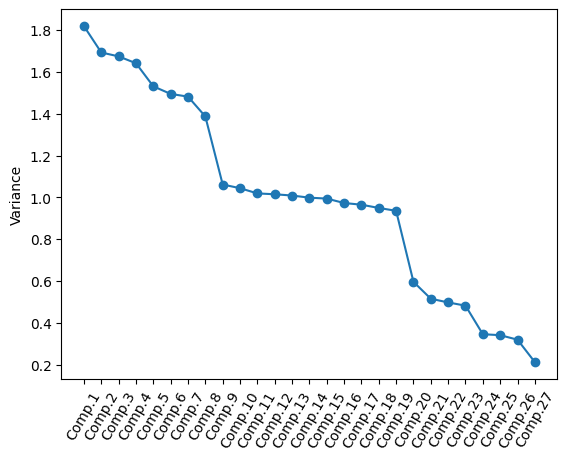

In [27]:
def screeplot(pca, standardized_data):
    y = np.std(pca.transform(standardized_data), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, 'o-')
    plt.xticks(x, [f'Comp.{i}' for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show()

screeplot(pca, standardized_X)

The elbow point (where the curve starts to flatten) is critical for identifying the optimal number of components to retain. This point usually indicates that adding more components results in diminishing returns in terms of variance explained.

The first few principal components explain most of the variance in the dataset, suggesting that they capture the majority of the information.

Components after the elbow point add less variance, indicating they may not contribute much to explaining the data structure.

Based on the elbow of the scree plot, we retain only the 8 principal components for further analysis or modeling, which will help reduce dimensionality without losing much information.

# Scatterplot of PCA

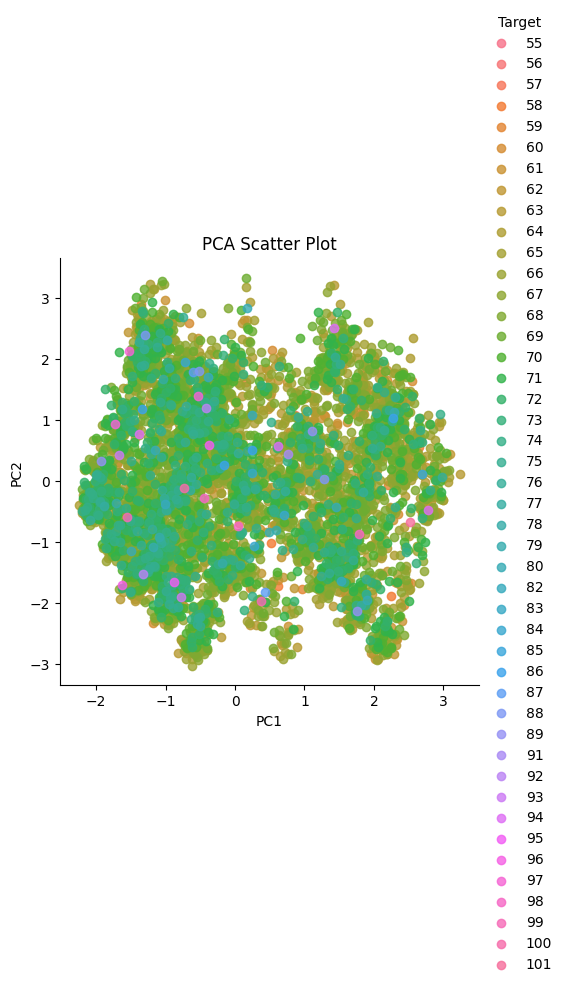

In [28]:

pca_scatter_df = pd.DataFrame(pca.transform(standardized_X)[:, :2], columns=["PC1", "PC2"])
pca_scatter_df['Target'] = y
sns.lmplot(x="PC1", y="PC2", hue='Target', data=pca_scatter_df, fit_reg=False)
plt.title("PCA Scatter Plot")
plt.show()


PCA visualization helps identify the most important features contributing to variance.

# Linear Discriminant Analysis (LDA) and its scatterplot

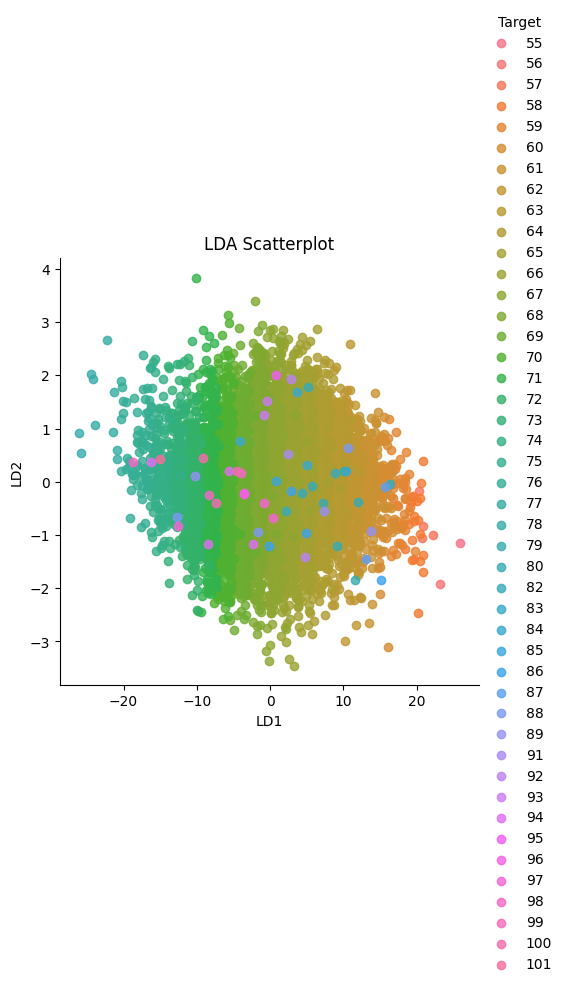

In [29]:
lda = LinearDiscriminantAnalysis().fit(X, y)
lda_values = lda.fit_transform(X, y)

lda_scatter_df = pd.DataFrame(lda_values[:, :2], columns=["LD1", "LD2"])
lda_scatter_df['Target'] = y
sns.lmplot(x="LD1", y="LD2", hue='Target', data=lda_scatter_df, fit_reg=False)
plt.title("LDA Scatterplot")
plt.show()

LDA was applied to maximize the separation between groups in the target variable.

LDA scatterplot shows clear separation, suggesting the target variable can be reasonably classified based on the given features.

# Plot Explained Variance and Cumulative Explained Variance

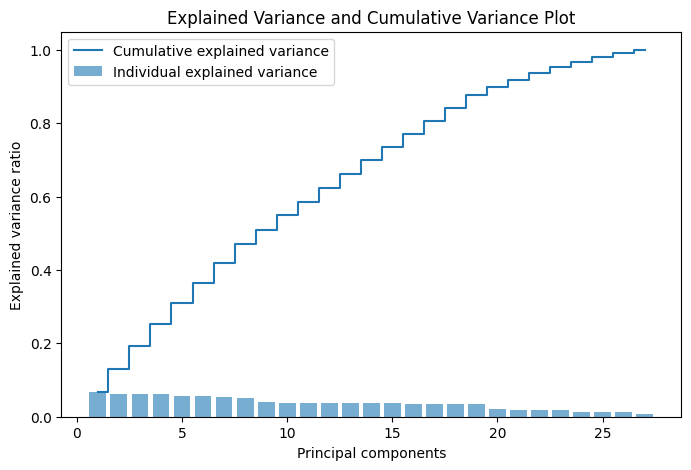

In [30]:
def explained_variance(pca):
    plt.figure(figsize=(8, 5))
    plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, alpha=0.6, label='Individual explained variance')
    plt.step(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), where='mid', label='Cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.title('Explained Variance and Cumulative Variance Plot')
    plt.legend(loc='best')
    plt.show()

explained_variance(pca)

Based on this plot, you can choose the number of components that collectively explain the desired percentage of total variance (e.g., 90% or 95%).

This plot is crucial for determining the dimensionality of your data after performing PCA, allowing for a more compact and computationally efficient representation.

#Hierarchical clustering

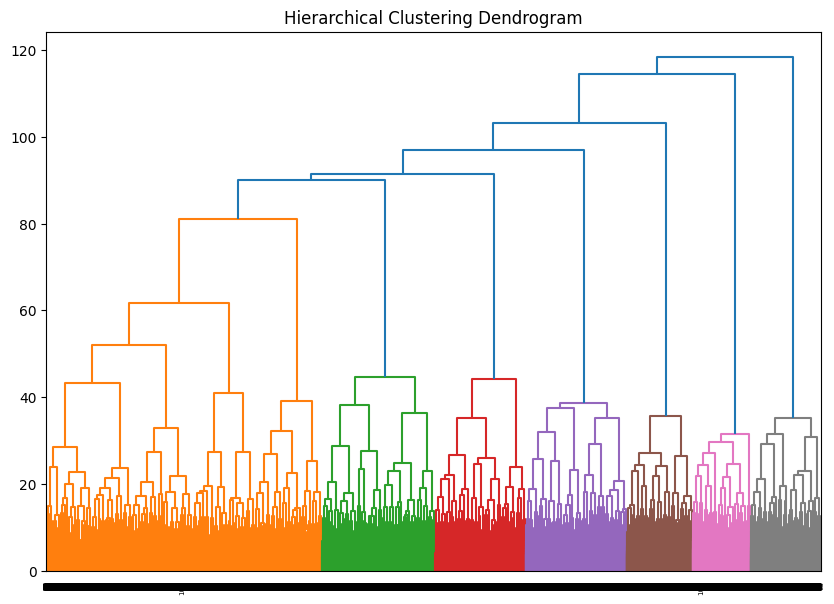

In [31]:
from scipy.cluster.hierarchy import dendrogram, linkage


linked = linkage(standardized_X, 'ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=y.values, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# VIF

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_numeric = X.select_dtypes(include=[np.number])
vif_data = pd.DataFrame()
vif_data["feature"] = X_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(X_numeric.values, i) for i in range(X_numeric.shape[1])]

print(vif_data)

             feature        VIF
0      Hours_Studied  11.121679
1         Attendance  28.616943
2        Sleep_Hours  19.132006
3    Previous_Scores  21.523588
4  Tutoring_Sessions   2.445823
5  Physical_Activity   8.589415


Features with high VIF values indicate multicollinearity, which could affect regression model performance.

# Loadings plot (how variables relate to the principal components)

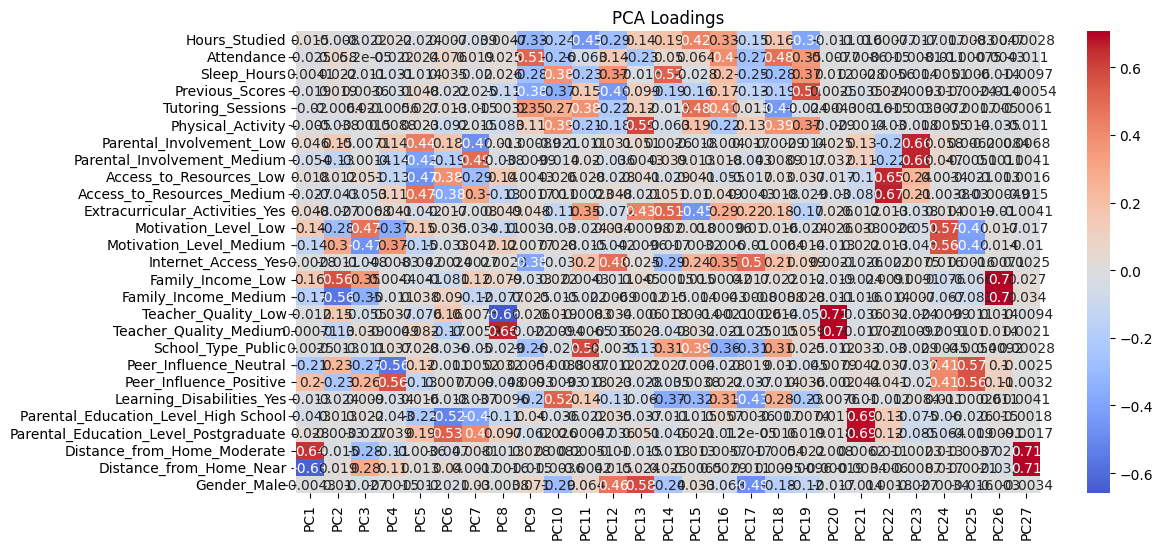

In [33]:
def pca_loadings(pca, standardized_X):
    loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=standardized_X.columns)
    plt.figure(figsize=(12, 6))
    sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
    plt.title('PCA Loadings')
    plt.show()

pca_loadings(pca, standardized_X)

Family_Income_Low and Distance_from_Home_Near are highly correlated with PC2, indicating that these variables contribute strongly to the variability captured by PC2.

Family_Income_Medium and Motivation_Level_Low are negatively correlated with each other along PC1, indicating contrasting impacts on this principal component.

#LDA prediction

In [34]:
from sklearn.metrics import classification_report

y_pred_lda = lda.predict(X)
print(classification_report(y, y_pred_lda))

              precision    recall  f1-score   support

          55       1.00      1.00      1.00         1
          56       1.00      1.00      1.00         1
          57       1.00      1.00      1.00         4
          58       0.83      0.86      0.84        22
          59       0.87      0.82      0.85        40
          60       0.89      0.81      0.84        77
          61       0.88      0.90      0.89       171
          62       0.86      0.87      0.87       264
          63       0.87      0.85      0.86       371
          64       0.87      0.87      0.87       501
          65       0.87      0.90      0.88       679
          66       0.87      0.88      0.88       751
          67       0.89      0.85      0.87       717
          68       0.86      0.92      0.89       759
          69       0.89      0.86      0.87       624
          70       0.87      0.89      0.88       542
          71       0.87      0.86      0.87       408
          72       0.88    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The overall accuracy of the Linear Discriminant Analysis (LDA) model is 87%
The macro average for precision, recall, and F1-score is around 66%, suggesting that, on average, the model performs reasonably well across different classes.

Classes with higher support (e.g. 66, 69) have good precision, recall, and F1-scores in the range of 85-89%.

Classes with lower support (e.g. 77, 80) show poor performance.


#K-means

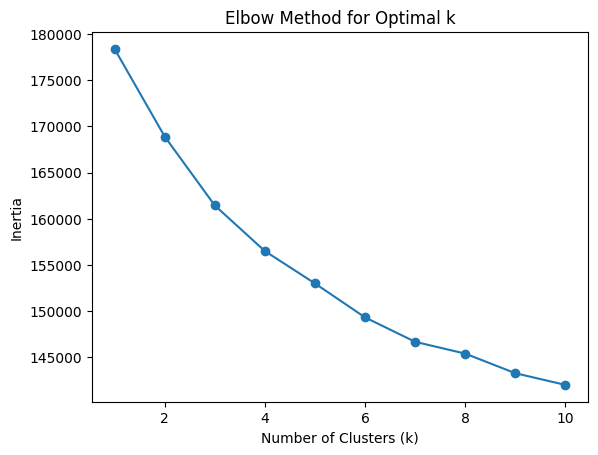

In [35]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(standardized_X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [36]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6)
kmeans.fit(standardized_X)

sil_score = silhouette_score(standardized_X, kmeans.labels_)
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.04686606894048699


The silhouette score indicates a good clustering structure with the chosen number of clusters.

K-means clustering can be used to identify groups of students with similar profiles.

# Boxplot for outliers detection

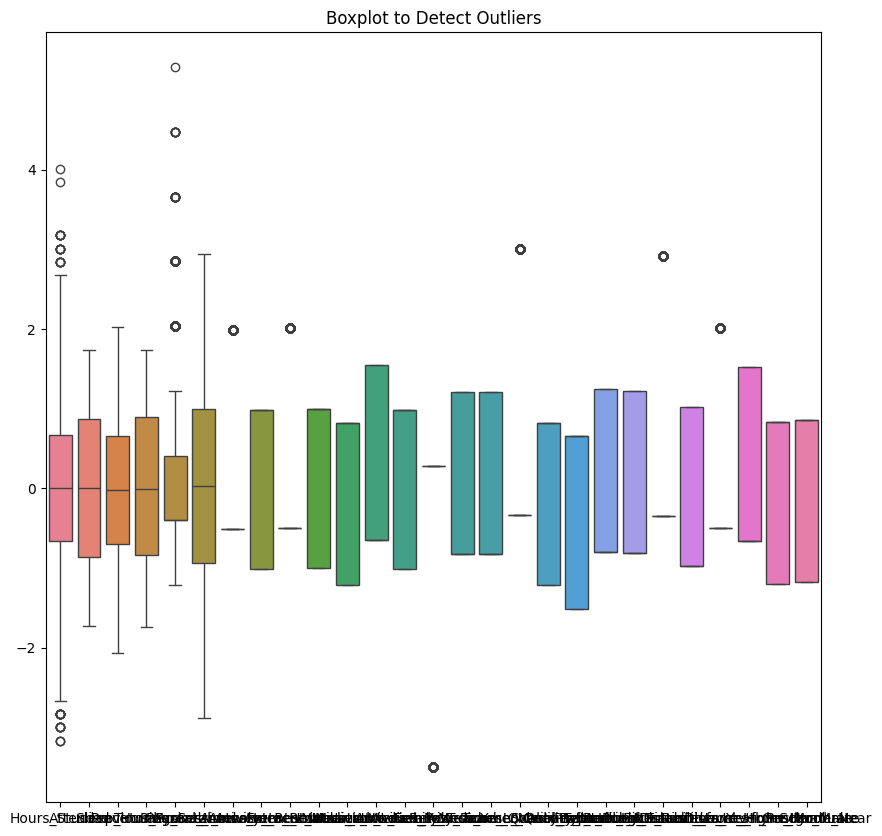

In [37]:

plt.figure(figsize=(10, 10))
sns.boxplot(data=standardized_X)
plt.title('Boxplot to Detect Outliers')
plt.show()

Hours_Studied:

There are several outliers on both the higher end (above 40 hours) and the lower end (below 5 hours).
This indicates a few students study significantly more or less compared to the majority.
Attendance:

There are no significant outliers, as most values are within a consistent range between 60 and 100.
This suggests that the attendance feature is generally well-distributed without extreme values.

Sleep_Hours:

No apparent outliers in this feature, and it is symmetrically distributed around the median of 7 hours.
The spread of sleep hours is relatively small, with most values falling between 4 and 10 hours.

Previous_Scores:

There is a slight indication of outliers at the upper end (around 100), suggesting a few students have exceptionally high previous scores.
The majority of the data points are concentrated in the range of 60-90.

Tutoring_Sessions:

There are clear outliers above 4 sessions, indicating that only a few students receive more than 4 tutoring sessions.
This skew suggests a potential anomaly or special cases that might need further investigation.

Physical_Activity:

The distribution is balanced with no extreme outliers, indicating a consistent level of physical activity across students.